In [1]:
import tensorflow as tf

(trainX, trainY), (testX, testY) = tf.keras.datasets.fashion_mnist.load_data()
# ((trainX, trainY), (testX, testY))

trainX[0]
trainX.shape
testX.shape
# 정답 레이블, 사진의 종류 10가지
trainY

class_name=['']

C:\Users\sunny\anaconda3\envs\im_000000\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\sunny\anaconda3\envs\im_000000\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\sunny\anaconda3\envs\im_000000\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


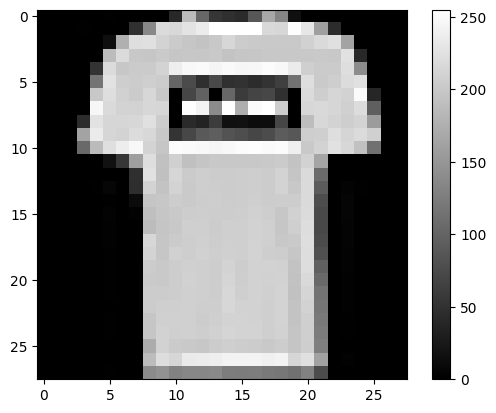

In [2]:
import matplotlib.pyplot as plt

plt.imshow(trainX[1])
plt.gray()
plt.colorbar()
plt.show()

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
    
])
# relu : 음수의 값을 제거해주세요.
# [0.2, 0.4 ....0.1] 확률 10개

model.summary()


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(trainX, trainY, epochs=5)



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 28, 128)           3712      
                                                                 
 dense_7 (Dense)             (None, 28, 64)            8256      
                                                                 
 flatten_1 (Flatten)         (None, 1792)              0         
                                                                 
 dense_8 (Dense)             (None, 10)                17930     
                                                                 
Total params: 29,898
Trainable params: 29,898
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2759 - accuracy: 0.7826
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4795

In [10]:
(trainX, trainY), (testX, testY) = tf.keras.datasets.fashion_mnist.load_data()

import numpy as np

# trainX.reshape((60000, 28, 28, 1))
trainX = trainX / 255.0
testX = testX / 255.0

trainX = trainX.reshape((trainX.shape[0], trainX.shape[1], trainX.shape[2], 1))
testX = testX.reshape((testX.shape[0], testX.shape[1], testX.shape[2], 1))

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
#     tf.keras.layers.Dense(128, activation='relu', input_shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
    
])
# relu : 음수의 값을 제거해주세요.
# [0.2, 0.4 ....0.1] 확률 10개

model.summary()


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(trainX, trainY, validation_data=(testX, testY), epochs=5)

# score = model.evaluate(testX, testY)
# print(score)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 6272)              0         
                                                                 
 dense_15 (Dense)            (None, 64)                401472    
                                                                 
 dense_16 (Dense)            (None, 10)                650       
                                                                 
Total params: 402,442
Trainable params: 402,442
Non-trainable params: 0
________________________________________________